In [1]:
%tensorflow_version 1.x
import tensorflow as tf 

TensorFlow 1.x selected.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install natsort==7.1.0 Pillow==8.0.1 gdown

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [4]:
import torch
import torch.nn as nn
import torchvision
from torch.utils import data
#import torchvision.models as models
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import os
import argparse
import matplotlib.pyplot as plt
from matplotlib import image
import math
import numpy
import random
%matplotlib inline

import numpy as np
import pandas as pd

In [5]:
manual_seed = 999
random.seed(manual_seed)
torch.manual_seed(manual_seed)

In [6]:
# Number of gpus available
ngpu = 1
device = torch.device('cuda:0' if (
    torch.cuda.is_available() and ngpu > 0) else 'cpu')

device

device(type='cpu')

In [7]:
from torchvision import transforms, datasets

In [8]:
import os
import zipfile

import gdown

from torch.utils.data import Dataset
from natsort import natsorted
from PIL import Image

#EMBEDDINGS FOR CELEBSET USING PreActResNet

In [9]:
# Root directory for the celebset dataset
data_root = 'data/celebset'
# Path to folder with individual images
img_folder1 = f'{data_root}/img_celebset'
# URL for the Celebset dataset
url = "https://drive.google.com/uc?id=1EGVVqy9ZUVg4ErPlgEGQuezDkcMPJBSh"
# Path to download the dataset to
download_path = f'{data_root}/img_celebset.zip'
# Create required directories 
if not os.path.exists(data_root):
  os.makedirs(data_root)
  os.makedirs(img_folder1)

# Download the dataset from google drive
gdown.download(url, download_path, quiet=False)

# Unzip the downloaded file 
with zipfile.ZipFile(download_path, 'r') as ziphandler:
  ziphandler.extractall(img_folder1)

Downloading...
From: https://drive.google.com/uc?id=1EGVVqy9ZUVg4ErPlgEGQuezDkcMPJBSh
To: /content/data/celebset/img_celebset.zip
11.0MB [00:00, 18.7MB/s]


In [11]:
class CelebADataset(Dataset):
  def __init__(self, root_dir, transform=None):
    """
    Args:
      root_dir (string): Directory with all the images
      transform (callable, optional): transform to be applied to each image sample
    """
    # Read names of images in the root directory
    image_names = os.listdir(root_dir)

    self.root_dir = root_dir
    self.transform = transform 
    self.image_names = natsorted(image_names)

  def __len__(self): 
    return len(self.image_names)

  def __getitem__(self, idx):
    # Get the path to the image 
    img_path = os.path.join(self.root_dir, self.image_names[idx])
    # Load image and convert it to RGB
    img = Image.open(img_path).convert('RGB')
    # Apply transformations to the image
    if self.transform:
      img = self.transform(img)

    return img

In [12]:
# Spatial size of training images, images are resized to this size.
image_size = 32
# Transformations to be applied to each individual image sample
transform=transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                          std=[0.5, 0.5, 0.5])
])

inv_normalize =  transforms.Normalize(
    mean=[-1, -1, -1],
    std=[1/0.5, 1/0.5, 1/0.5]
)
# Load the dataset from file and apply transformations
celebset_dataset= CelebADataset(f'{img_folder1}/img_celebset', transform)

In [21]:
import pandas as pd
attributes1 = pd.read_csv('/content/drive/My Drive/list_attr_celebset.csv')

#attributes=pd.read_csv("list_attr_celeba.csv")


In [22]:
y1=attributes1['male']
y_names=attributes1['filename']

idx_male=[]
idx_female=[]
for i in range(1600):
  if y1[i]==0:
    idx_female.append(i)
  else:
    idx_male.append(i)

print(len(idx_male),len(idx_female))
print(idx_male)
print(idx_female)

800 800
[3, 4, 5, 6, 7, 8, 10, 15, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 339,

In [23]:
# Preparing data for stratified K-fold cross-validation
from sklearn.model_selection import StratifiedKFold
dataset_X=[]
dataset_y=[]
for i in range(1600):
  #if i not in test_inddex:
    dataset_X.append(celebset_dataset.__getitem__(i))
    dataset_y.append(y1[i])

print(len(dataset_y))
#dataset_X=numpy.array(dataset_X)
#dataset_y=numpy.array(dataset_y)
skf = StratifiedKFold(n_splits=10)
print(skf.get_n_splits(dataset_X, dataset_y))
print(skf)
#print(dataset_X[1])
#print(dataset_y[1])

1600
10
StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [ ]:
df = pd.read_excel ('/content/drive/MyDrive/test_train_valid.xlsx')

In [ ]:
df.head(10)

,TEST,1,2,13,14,16,17,18,20,41,42,43,44,45,49,50,54,55,56,57,58,61,63,65,67,68,70,72,74,75,76,77,79,80,201,208,209,210,211,212,...,Unnamed: 1311,Unnamed: 1312,Unnamed: 1313,Unnamed: 1314,Unnamed: 1315,Unnamed: 1316,Unnamed: 1317,Unnamed: 1318,Unnamed: 1319,Unnamed: 1320,Unnamed: 1321,Unnamed: 1322,Unnamed: 1323,Unnamed: 1324,Unnamed: 1325,Unnamed: 1326,Unnamed: 1327,Unnamed: 1328,Unnamed: 1329,Unnamed: 1330,Unnamed: 1331,Unnamed: 1332,Unnamed: 1333,Unnamed: 1334,Unnamed: 1335,Unnamed: 1336,Unnamed: 1337,Unnamed: 1338,Unnamed: 1339,Unnamed: 1340,Unnamed: 1341,Unnamed: 1342,Unnamed: 1343,Unnamed: 1344,Unnamed: 1345,Unnamed: 1346,Unnamed: 1347,Unnamed: 1348,Unnamed: 1349,Unnamed: 1350
0,Fold1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TRAIN,132.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,150.0,151.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,166.0,167.0,168.0,169.0,170.0,171.0,173.0,174.0,175.0,176.0,...,1560.0,1561.0,1562.0,1563.0,1564.0,1565.0,1566.0,1567.0,1568.0,1569.0,1570.0,1571.0,1572.0,1573.0,1574.0,1575.0,1576.0,1577.0,1578.0,1579.0,1580.0,1581.0,1582.0,1583.0,1584.0,1585.0,1586.0,1587.0,1588.0,1589.0,1590.0,1591.0,1592.0,1593.0,1594.0,1595.0,1596.0,1597.0,1598.0,1599.0
2,VALID,0.0,3.0,4.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,15.0,19.0,21.0,22.0,23.0,24.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,46.0,47.0,48.0,51.0,52.0,53.0,59.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fold2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TRAIN,0.0,3.0,4.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,15.0,19.0,21.0,22.0,23.0,24.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,46.0,47.0,48.0,51.0,52.0,53.0,59.0,60.0,...,1560.0,1561.0,1562.0,1563.0,1564.0,1565.0,1566.0,1567.0,1568.0,1569.0,1570.0,1571.0,1572.0,1573.0,1574.0,1575.0,1576.0,1577.0,1578.0,1579.0,1580.0,1581.0,1582.0,1583.0,1584.0,1585.0,1586.0,1587.0,1588.0,1589.0,1590.0,1591.0,1592.0,1593.0,1594.0,1595.0,1596.0,1597.0,1598.0,1599.0
5,VALID,132.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,150.0,151.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,166.0,167.0,168.0,169.0,170.0,171.0,173.0,174.0,175.0,176.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fold3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,TRAIN,0.0,3.0,4.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,15.0,19.0,21.0,22.0,23.0,24.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,46.0,47.0,48.0,51.0,52.0,53.0,59.0,60.0,...,1560.0,1561.0,1562.0,1563.0,1564.0,1565.0,1566.0,1567.0,1568.0,1569.0,1570.0,1571.0,1572.0,1573.0,1574.0,1575.0,1576.0,1577.0,1578.0,1579.0,1580.0,1581.0,1582.0,1583.0,1584.0,1585.0,1586.0,1587.0,1588.0,1589.0,1590.0,1591.0,1592.0,1593.0,1594.0,1595.0,1596.0,1597.0,1598.0,1599.0
8,VALID,233.0,234.0,235.0,236.0,237.0,238.0,239.0,259.0,260.0,261.0,262.0

In [ ]:
train_idx=df.iloc[7]
train_idx=np.array(train_idx)[1:]

In [ ]:
val_idx=df.iloc[8]
val_idx=np.array(val_idx)[1:151]

In [ ]:
test_idx=np.array(df.columns)
test_idx=test_idx[1:101]

In [ ]:
trainset = []
for i in range(len(train_idx)):
    trainset.append(dataset_X[int(train_idx[i])])

len(trainset)

1350

In [ ]:
validset = []
for i in range(len(val_idx)):
    validset.append(dataset_X[int(val_idx[i])])

len(validset)

150

In [ ]:
testset = []
for i in range(len(test_idx)):
    testset.append(dataset_X[int(test_idx[i])])

len(testset)

100

In [ ]:
#trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10,
                                          shuffle=False, num_workers=8)
 
#validset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
validloader = torch.utils.data.DataLoader(validset, batch_size=10,
                                         shuffle=False, num_workers=8)

testloader = torch.utils.data.DataLoader(testset, batch_size=10,
                                         shuffle=False, num_workers=8)

In [ ]:
#test_inddex=[1, 2, 13, 14, 16, 17, 18, 20, 41, 42, 43, 44, 45, 49, 50, 54, 55, 56, 57, 58, 61, 63, 65, 67, 68, 70, 72, 74, 75, 76, 77, 79, 80, 201, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 240, 241, 242, 243, 244, 5, 25, 81, 123, 133, 134, 149, 152, 165, 172, 221, 265, 266, 267, 270, 277, 305, 306, 307, 309, 316, 354, 380, 382, 385, 390, 419, 420, 421, 424, 425, 429, 431, 436, 463, 464, 477, 483, 489, 495, 521, 524, 567, 720, 721, 750, 755, 756, 760, 763]
#final_test_set=[]
#for i in test_inddex:
#  final_test_set.append((celebset_dataset.__getitem__(i),y1[i]))

#final_testloader = torch.utils.data.DataLoader(final_test_set, batch_size=10,
#                                          shuffle=False, num_workers=8)

In [ ]:
PATH = '/content/drive/MyDrive/genderclassifier_new_3.pth'
model = torch.load(PATH)
#model.eval()
model.keys()

dict_keys(['net', 'acc', 'epoch', 'optimizer'])

In [14]:
import sys
sys.path.insert(0,'/content/drive/My Drive/pytorch-cifar-master')

import models
from models import *
load_model=True


In [ ]:
net = PreActResNet18()
PATH = '/content/drive/MyDrive/genderclassifier_new_3.pth'

net.load_state_dict((torch.load(PATH))['net'])
net.eval()

PreActResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (layer1): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (1): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
  )
  (layer2): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d

In [ ]:
activation = {}
X_train = []

def get_activation(name):
    def hook(net, input, output):
        activation[name] = output.detach()
    return hook

net.layer4.register_forward_hook(get_activation('layer4'))
for batch_idx, inputs in enumerate(trainloader):
  net.output = net(inputs)
  for i in range(len(inputs)):
    X_train.append(list(np.array((activation['layer4']).cpu())[i]))
    #y_raw.append((np.array((targets).cpu())[i]))

y_train = []
for i in range(len(train_idx)):
    y_train.append(dataset_y[int(train_idx[i])])

In [ ]:
activation = {}
X_valid = []

def get_activation(name):
    def hook(net, input, output):
        activation[name] = output.detach()
    return hook

net.layer4.register_forward_hook(get_activation('layer4'))
for batch_idx, inputs in enumerate(validloader):
  net.output = net(inputs)
  for i in range(len(inputs)):
    X_valid.append(list(np.array((activation['layer4']).cpu())[i]))
    #y_raw.append((np.array((targets).cpu())[i]))

y_valid = []
for i in range(len(val_idx)):
    y_valid.append(dataset_y[int(val_idx[i])])

In [ ]:
activation = {}
X_test = []

def get_activation(name):
    def hook(net, input, output):
        activation[name] = output.detach()
    return hook

net.layer4.register_forward_hook(get_activation('layer4'))
for batch_idx, inputs in enumerate(testloader):
  net.output = net(inputs)
  for i in range(len(inputs)):
    X_test.append(list(np.array((activation['layer4']).cpu())[i]))
    #y_raw.append((np.array((targets).cpu())[i]))

y_test = []
for i in range(len(test_idx)):
    y_test.append(dataset_y[int(test_idx[i])])

#SHAPLEY PART

In [ ]:
import sys
sys.path.append('drive/My Drive/')

In [ ]:
%reload_ext autoreload
%autoreload 2
import torch
import os
import sys
import time
import numpy as np
from drive.MyDrive.DataShapley.DataShapley.Shapley import ShapNN
from drive.MyDrive.DataShapley.DataShapley.DShap import DShap
from collections import OrderedDict
import matplotlib.pyplot as plt
import pickle

import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from drive.MyDrive.DataShapley.DataShapley.shap_utils import *
%matplotlib inline
MEM_DIR = './'

In [ ]:
problem, model = 'classification', 'NN'
hidden_units = [50,30,2] # Empty list in the case of logistic regression.
train_size = 1350
X_raw = X_train + X_test + X_valid
y_raw = y_train + y_test + y_valid

for i in range(len(X_raw)):

  for j in range(len(X_raw[i])):
    X_raw[i][j] = np.mean(X_raw[i][j])

X_raw = np.array(X_raw)
y_raw = np.array(y_raw)

In [ ]:
#d, difficulty = 50, 3
num_classes = 2
tol = 0.03
target_accuracy = 0.7
#important_dims = 5
clf = return_model(model , hidden_layer_sizes=tuple(hidden_units),learning_rate = 0.1,activation = 'tanh')
_param = 1.0
for it in range(50):
    #X_raw = np.random.multivariate_normal(mean=np.zeros(d), cov = np.eye(d), 
    #                                      size=train_size + 100)
    #_, y_raw, y_t_vals, _ = label_generator(
    #    problem, X_raw, param = _param,  difficulty = difficulty, important=important_dims)


    clf.fit(X_raw[:train_size], y_raw[:train_size])
    test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
    
    if test_acc > target_accuracy:
        
        break
    _param *= 1.1
print('Performance using the whole training set = {0:.2f}'.format(test_acc))
#plt.plot(y_t_vals)
#print(np.sum(y_t_vals==y_raw).astype(int))

Performance using the whole training set = 0.89


In [ ]:
filename = '3_layer_net.sav'
pickle.dump(clf, open(filename, 'wb'))
 
# some time later...
#line no 241 in DShap for downloading last trained model while g_shap iterations 
# load the model from disk
clf_1 = pickle.load(open(filename, 'rb'))

In [ ]:
clf_1.predict_proba([X_raw[0]])

array([[0.98244369, 0.01755631]])

In [ ]:
device_name =  tf.test.gpu_device_name()
with tf.device(device_name):
  config = tf.ConfigProto()
  print(config)
  config.gpu_options.visible_device_list="0,1"
print(config)


gpu_options {
  visible_device_list: "0,1"
}



In [ ]:
X, y = X_raw[:train_size], y_raw[:train_size]
X_test, y_test = X_raw[train_size:], y_raw[train_size:]
model = 'NN'
problem = 'classification'
num_test = 100
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, 
              sources=None,
              sample_weight=None,
              model_family=model,
              #err =100,
              metric='accuracy',
              overwrite=True,
              directory=directory)#, seed=0
dshap.run(50, 0.25, g_run=True, loo_run =False)
dshap.merge_results()

LOO values calculated!
Error :  1.0
10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations
100 out of 100 G-Shapley iterations
Error :  33485317.050934393
10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations
100 out of 100 G-Shapley iterations
Error :  1352888.4104848842
10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterati

In [16]:
import nltk
import pickle

In [ ]:
'''objects = []
with (open("/content/temp/loo.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break'''

In [17]:
objects1 = []
with (open("/content/drive/MyDrive/mem_g_0000.pkl", "rb")) as openfile:   ##/content/temp/mem_g_0000.pkl
    while True:
        try:
            objects1.append(pickle.load(openfile))
        except EOFError:
            break

#from google.colab import files
#files.download('/content/temp/mem_g_0000.pkl')

In [ ]:
'''objects2 = []
with (open("/content/temp/mem_tmc_0000.pkl", "rb")) as openfile:
    while True:
        try:
            objects2.append(pickle.load(openfile))
        except EOFError:
            break'''

In [18]:
#loo_order = list(range(0,500))
#loo_value = list(objects[0]['loo'])
#tmc_order = list(objects2[0]['idxs_tmc'][-1])
#tmc_value =(list(objects2[0]['mem_tmc'][-1]))
g_order = list(objects1[0]['idxs_g'][-1])
g_value =(list(objects1[0]['mem_g'][-1]))
#g_df = pd.DataFrame([g_order,g_value])
#g_df.to_csv('/content/drive/MyDrive/DataShapley/DataShapley/ShapleyIndicesandValues.csv')

In [38]:
import models
from models import *
load_model=True

In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01,
                      momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

def load_checkpoint(check_point,map_location='cpu'):
  print("=> loading check_point")
  net.load_state_dict(check_point['net'])
  optimizer.load_state_dict(check_point['optimizer'])

In [68]:
def train(epoch,net,optimizer,trainloader):
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        print(batch_idx, len(trainloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                     % (train_loss/(batch_idx+1), 100.*correct/total, correct, total))
    
    return net

In [69]:
best_acc = 0

In [70]:

def test(epoch,net,testloader):
    global best_acc
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    wrong_pred=[]
    right_pred=[]
    true=[]
    pred=[]
    image=[]
    true_c=[]
    pred_c=[]
    image_c=[]
    true_all=[]
    pred_all=[]
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)
           
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            # print('predicted:',predicted)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            print(batch_idx, len(testloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                         % (test_loss/(batch_idx+1), 100.*correct/total, correct, total))
            for i in range(len(predicted)):
                pred_all.append(predicted[i])
                true_all.append(targets[i])
                if(predicted[i]!=targets[i]):
                    true.append(targets[i])
                    pred.append(predicted[i])
                    wrong_pred.append(batch_idx*32+i)
                #pred_wrong.append(preds[i])
                #true_wrong.append(target[i])
                    image.append(inputs[i])
                else:
                    true_c.append(targets[i])
                    pred_c.append(predicted[i])
                    right_pred.append(batch_idx*32+i)
                    image_c.append(inputs[i])
            
    print(wrong_pred)
    acc = 100.*correct/total
    if acc > best_acc:
        print('Saving..')
        state = {
            'net': net.state_dict(),
            'acc': acc,
            'epoch': epoch,
            'optimizer':optimizer.state_dict(),
        }
        
        #torch.save(state, '/content/drive/My Drive/genderclassifier_new_'+str(fold_no*10)+'.pth')
        best_acc = acc
    return true,pred,wrong_pred,image,pred_all,true_c,pred_c,right_pred,image_c,true_all

In [73]:

def PARN_train(dataset_X_train,dataset_y_train,dataset_X_test,dataset_y_test):
  results=[]

  net = PreActResNet18()
  net = net.to(device)
  optimizer = optim.SGD(net.parameters(), lr=0.01,
                      momentum=0.9, weight_decay=5e-4)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

  tn_set = []
  tt_set = []

  for j in range(len(dataset_X_train)):
    tn_set.append((dataset_X_train[j],dataset_y_train[j]))

  for j in range(len(dataset_X_test)):
    tt_set.append((dataset_X_test[j],dataset_y_test[j]))

  trainloader = torch.utils.data.DataLoader(tn_set, batch_size=128,
                                          shuffle=False, num_workers=8)
  testloader = torch.utils.data.DataLoader(tt_set, batch_size=128,
                                          shuffle=False, num_workers=8)
  for epoch in range(50):
    net=train(epoch,net,optimizer,trainloader)
    test(epoch,net,testloader)
    scheduler.step()
  true,pred,wrong_pred,image,pred_all,true_c,pred_c,right_pred,image_c,true_all=test(epoch,net,testloader)
  y_true=[]
  y_pred=[]
  for i in range(len(dataset_y_test)):
    y_true.append(dataset_y_test[i])
  for i in range(len(pred_all)):
    y_pred.append(pred_all[i].item())
  #print(true_all)
  import sklearn
  from sklearn.metrics import confusion_matrix
  cm=confusion_matrix(y_true,y_pred,labels=[0,1])

  acc_m=cm[1][1]/(sum(cm[1]))
  acc_f=cm[0][0]/sum(cm[0])
  acc_all=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
  eval_stats=sklearn.metrics.precision_recall_fscore_support(y_true,y_pred)
  #results.append([cm,acc_m,acc_f,acc_all,eval_stats])

  return acc_all

In [74]:
'''d = dict()
d1 = dict()

for i in loo_order:
  d1[i] = loo_value[i]
d1=dict(sorted(d1.items(), key=lambda t: t[1],reverse=True))

print(d1.keys())
for i in d1.keys():
  d[i] = (list(X_raw[i]),y_raw[i])
X_train = []  
y_train = []
for i in d.keys():
  X_train.append(X_raw[i])
  y_train.append(y_raw[i])
test_accuracy = []
for i in range(1,train_size):
  if i%100==0:
    print(str(i)+'/'+str(train_size))
  clf.fit(X_train[0:i], y_train[0:i])
  test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
  test_accuracy.append(test_acc)

df1 = pd.DataFrame(test_accuracy,columns=['Acc'])

#####        tmc_val        #####

d = dict()
d1 = dict()

for i in tmc_order:
  d1[i] = tmc_value[i]
d1=dict(sorted(d1.items(), key=lambda t: t[1],reverse=True))

for i in d1.keys():
  d[i] = (list(X_raw[i]),y_raw[i])
X_train = []  
y_train = []
for i in d.keys():
  X_train.append(X_raw[i])
  y_train.append(y_raw[i])
test_accuracy = []
for i in range(1,train_size):
  if i%100==0:
    print(str(i)+'/'+str(train_size))
  clf.fit(X_train[0:i], y_train[0:i])
  test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
  test_accuracy.append(test_acc)

df2 = pd.DataFrame(test_accuracy,columns=['Acc'])'''

#####        g_val        #####

train_size = 1350

d = dict()
d1 = dict()

for i in range(len(g_order)):
  d1[g_order[i]] = g_value[i]
d1=dict(sorted(d1.items(), key=lambda t: t[1],reverse=True))

for i in d1.keys():
  d[i] = (list(dataset_X[i]),dataset_y[i])
X_train = []  
y_train = []
for i in d.keys():
  X_train.append(dataset_X[i])
  y_train.append(dataset_y[i])
test_accuracy = []
for i in list(np.arange(70,1350,70)) + [1350]:
  if i%100==0:
    print(str(i)+'/'+str(train_size))

  
  #clf_a = return_model(model , hidden_layer_sizes=tuple(hidden_units),learning_rate = 0.1,activation = 'tanh')
  #net.(X_train[0:i], y_train[0:i])
  #test_acc = net.score(dataset_X[train_size:], dataset_X[train_size:])
  test_acc = PARN_train(dataset_X[0:i], dataset_y[0:i],dataset_X[train_size:], dataset_y[train_size:])
  test_accuracy.append(test_acc)

df3 = pd.DataFrame(test_accuracy,columns=['Acc'])

fig, ax = plt.subplots(figsize=(30,10)) 
plt.title("Line graph",fontsize = 20)  
plt.xlabel("Number of high shapley valued points added",fontsize = 30)  
plt.ylabel("Test accuracy",fontsize = 30)  
#plt.plot(df1['Acc'].rolling(150).mean(),color='r', label="loo")
#plt.plot(df2['Acc'].rolling(150).mean(),color='g', label="tmc")
plt.plot(df3['Acc'].rolling(50).mean(),color='b', label="g_shap")
plt.legend(loc="upper left")
plt.grid() 
plt.show()


Epoch: 0
0 1 Loss: 0.749 | Acc: 40.000% (28/70)
0 2 Loss: 0.692 | Acc: 61.719% (79/128)
1 2 Loss: 0.693 | Acc: 54.000% (135/250)
[0, 1, 2, 5, 6, 7, 8, 10, 11, 13, 15, 18, 20, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 53, 57, 60, 63, 66, 67, 70, 71, 79, 85, 89, 92, 95, 99, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 126, 127, 32, 33, 34, 35, 40, 42, 44, 45, 46, 47, 49, 51, 58, 59, 60, 61, 62, 64, 65, 66, 67, 70, 71, 72, 73, 74, 75, 76, 79, 81, 84, 87, 88, 89, 90, 91, 92, 93, 94, 97, 98, 99, 101, 102, 106, 109, 112, 113, 114, 115, 116, 118, 119, 120, 124, 129, 133, 135, 136, 138, 141, 142, 143, 144, 148, 152]

Epoch: 1
0 1 Loss: 0.640 | Acc: 60.000% (42/70)
0 2 Loss: 0.690 | Acc: 61.719% (79/128)
1 2 Loss: 0.688 | Acc: 70.400% (176/250)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 32, 33, 34, 35, 36, 57, 58, 59, 60, 61, 62, 63, 6

NameError: ignored

In [ ]:
'''d = dict()
d1 = dict()

for i in loo_order:
  d1[i] = loo_value[i]
d1=dict(sorted(d1.items(), key=lambda t: t[1],reverse=True))

print(d1.keys())
for i in d1.keys():
  d[i] = (list(X_raw[i]),y_raw[i])
X_train = []  
y_train = []
for i in d.keys():
  X_train.append(X_raw[i])
  y_train.append(y_raw[i])
test_accuracy = []
for i in range(1,train_size):
  if i%100==0:
    print(str(i)+'/'+str(train_size))
  clf.fit(X_train[i:train_size], y_train[i:train_size])
  test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
  test_accuracy.append(test_acc)

df1 = pd.DataFrame(test_accuracy,columns=['Acc'])

#####        tmc_val        #####

d = dict()
d1 = dict()

for i in tmc_order:
  d1[i] = tmc_value[i]
d1=dict(sorted(d1.items(), key=lambda t: t[1],reverse=True))

for i in d1.keys():
  d[i] = (list(X_raw[i]),y_raw[i])
X_train = []  
y_train = []
for i in d.keys():
  X_train.append(X_raw[i])
  y_train.append(y_raw[i])
test_accuracy = []
for i in range(1,train_size):
  if i%100==0:
    print(str(i)+'/'+str(train_size))
  clf.fit(X_train[i:train_size], y_train[i:train_size])
  test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
  test_accuracy.append(test_acc)

df2 = pd.DataFrame(test_accuracy,columns=['Acc'])'''

#####        g_val        #####

d = dict()
d1 = dict()

for i in range(len(g_order)):
  d1[g_order[i]] = g_value[i]
d1=dict(sorted(d1.items(), key=lambda t: t[1],reverse=True))

for i in d1.keys():
  d[i] = (list(dataset_X[i]),dataset_y[i])
X_train = []  
y_train = []
for i in d.keys():
  X_train.append(dataset_X[i])
  y_train.append(dataset_y[i])
test_accuracy = []
for i in list(np.arange(70,1350,70)) + [1350]:
  if i%100==0:
    print(str(i)+'/'+str(train_size))

  
  #clf_a = return_model(model , hidden_layer_sizes=tuple(hidden_units),learning_rate = 0.1,activation = 'tanh')
  #net.(X_train[0:i], y_train[0:i])
  #test_acc = net.score(dataset_X[train_size:], dataset_X[train_size:])
  test_acc = PARN_train(dataset_X[i:train_size], dataset_y[i:train_size],dataset_X[train_size:], dataset_y[train_size:])
  test_accuracy.append(test_acc)

df3 = pd.DataFrame(test_accuracy,columns=['Acc'])

fig, ax = plt.subplots(figsize=(30,10)) 
plt.title("Line graph",fontsize = 20)  
plt.xlabel("Number of high shapley valued points removed",fontsize = 30)  
plt.ylabel("Test accuracy",fontsize = 30)  
#plt.plot(df1['Acc'].rolling(150).mean(),color='r', label="loo")
#plt.plot(df2['Acc'].rolling(150).mean(),color='g', label="tmc")
plt.plot(df3['Acc'].rolling(50).mean(),color='b', label="g_shap")
plt.legend(loc="upper left")
plt.grid() 
plt.show()


Epoch: 0
0 10 Loss: 0.655 | Acc: 77.344% (99/128)
1 10 Loss: 1.012 | Acc: 63.281% (162/256)
2 10 Loss: 0.960 | Acc: 62.760% (241/384)
3 10 Loss: 0.906 | Acc: 57.031% (292/512)
4 10 Loss: 0.868 | Acc: 54.844% (351/640)
5 10 Loss: 0.840 | Acc: 53.776% (413/768)
6 10 Loss: 0.808 | Acc: 55.469% (497/896)
7 10 Loss: 0.851 | Acc: 51.074% (523/1024)
8 10 Loss: 0.830 | Acc: 53.125% (612/1152)
9 10 Loss: 0.819 | Acc: 54.297% (695/1280)
0 2 Loss: 0.671 | Acc: 61.719% (79/128)
1 2 Loss: 0.664 | Acc: 70.400% (176/250)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 32, 33, 34, 35, 36, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]

Epoch: 1
0 10 Loss: 1.914 | Acc: 8.594% (11/128)
1 10 Loss: 1.288 | Acc: 34.766% (89/256)
2 10 Loss: 1.072 | Acc: 44.271% (170/384)
3 10 Loss: 0.927 | Acc: 53.711% (275/512)
4 10 Loss: 

NameError: ignored

100/1350
200/1350
300/1350
400/1350
500/1350
600/1350
700/1350
800/1350
900/1350
1000/1350
1100/1350
1200/1350
1300/1350


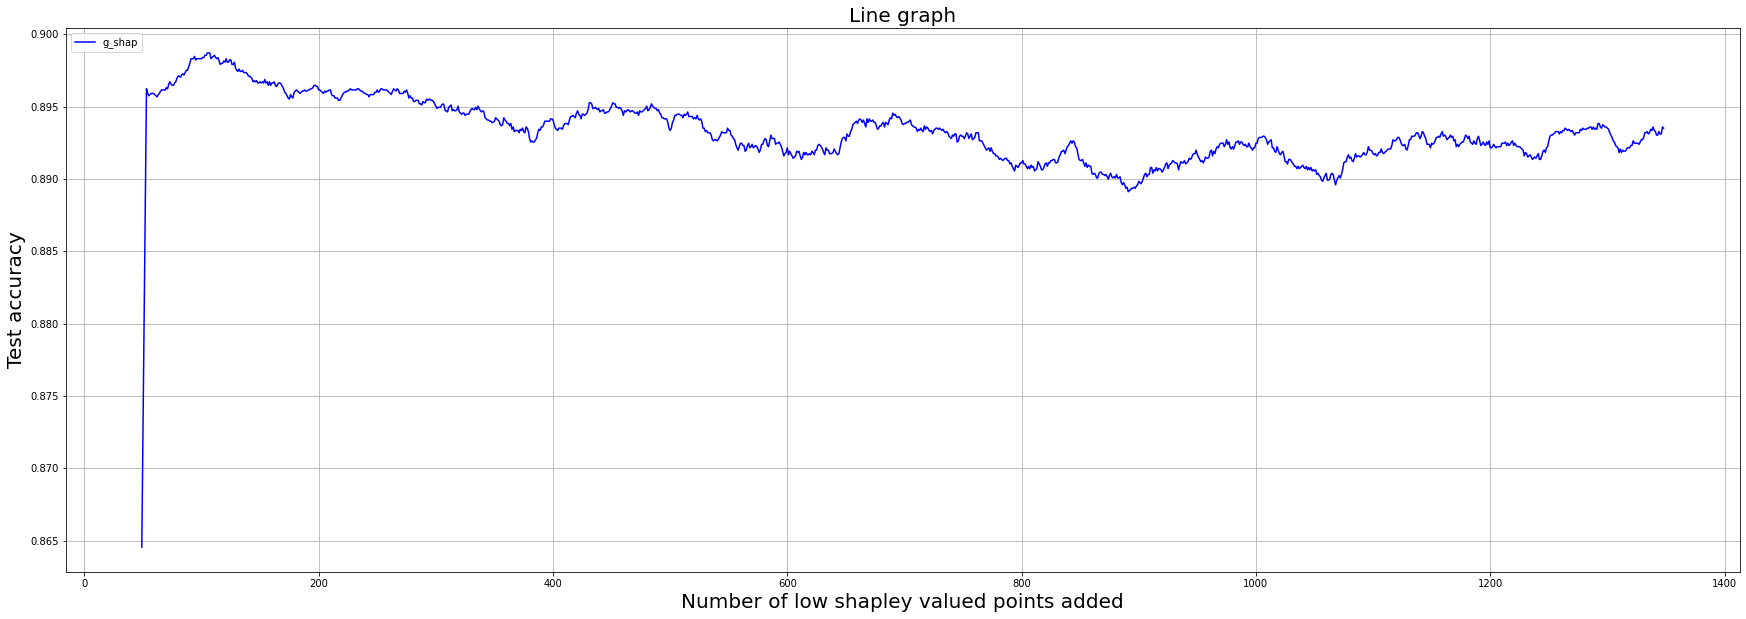

In [ ]:
'''d = dict()
d1 = dict()

for i in loo_order:
  d1[i] = loo_value[i]
d1=dict(sorted(d1.items(), key=lambda t: t[1]))

print(d1.keys())
for i in d1.keys():
  d[i] = (list(X_raw[i]),y_raw[i])
X_train = []  
y_train = []
for i in d.keys():
  X_train.append(X_raw[i])
  y_train.append(y_raw[i])
test_accuracy = []
for i in range(1,train_size):
  if i%100==0:
    print(str(i)+'/'+str(train_size))
  clf.fit(X_train[0:i], y_train[0:i])
  test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
  test_accuracy.append(test_acc)

df1 = pd.DataFrame(test_accuracy,columns=['Acc'])

#####        tmc_val        #####

d = dict()
d1 = dict()

for i in tmc_order:
  d1[i] = tmc_value[i]
d1=dict(sorted(d1.items(), key=lambda t: t[1]))

for i in d1.keys():
  d[i] = (list(X_raw[i]),y_raw[i])
X_train = []  
y_train = []
for i in d.keys():
  X_train.append(X_raw[i])
  y_train.append(y_raw[i])
test_accuracy = []
for i in range(1,train_size):
  if i%100==0:
    print(str(i)+'/'+str(train_size))
  clf.fit(X_train[0:i], y_train[0:i])
  test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
  test_accuracy.append(test_acc)

df2 = pd.DataFrame(test_accuracy,columns=['Acc'])'''

#####        g_val        #####

d = dict()
d1 = dict()

for i in range(len(g_order)):
  d1[g_order[i]] = g_value[i]
d1=dict(sorted(d1.items(), key=lambda t: t[1]))

for i in d1.keys():
  d[i] = (list(X_raw[i]),y_raw[i])
X_train = []  
y_train = []
for i in d.keys():
  X_train.append(X_raw[i])
  y_train.append(y_raw[i])
test_accuracy = []
for i in range(1,train_size):
  if i%100==0:
    print(str(i)+'/'+str(train_size))
  clf_c = return_model(model , hidden_layer_sizes=tuple(hidden_units),learning_rate = 0.1,activation = 'tanh')
  clf_c.fit(X_train[0:i], y_train[0:i])
  test_acc = clf_c.score(X_raw[train_size:], y_raw[train_size:])
  test_accuracy.append(test_acc)

df3 = pd.DataFrame(test_accuracy,columns=['Acc'])

fig, ax = plt.subplots(figsize=(30,10)) 
plt.title("Line graph",fontsize = 20)  
plt.xlabel("Number of low shapley valued points added",fontsize = 30)  
plt.ylabel("Test accuracy",fontsize = 30)  
#plt.plot(df1['Acc'].rolling(150).mean(),color='r', label="loo")
#plt.plot(df2['Acc'].rolling(150).mean(),color='g', label="tmc")
plt.plot(df3['Acc'].rolling(50).mean(),color='b', label="g_shap")
plt.legend(loc="upper left")
plt.grid() 
plt.show()

100/1350
200/1350
300/1350
400/1350
500/1350
600/1350
700/1350
800/1350
900/1350
1000/1350
1100/1350
1200/1350
1300/1350


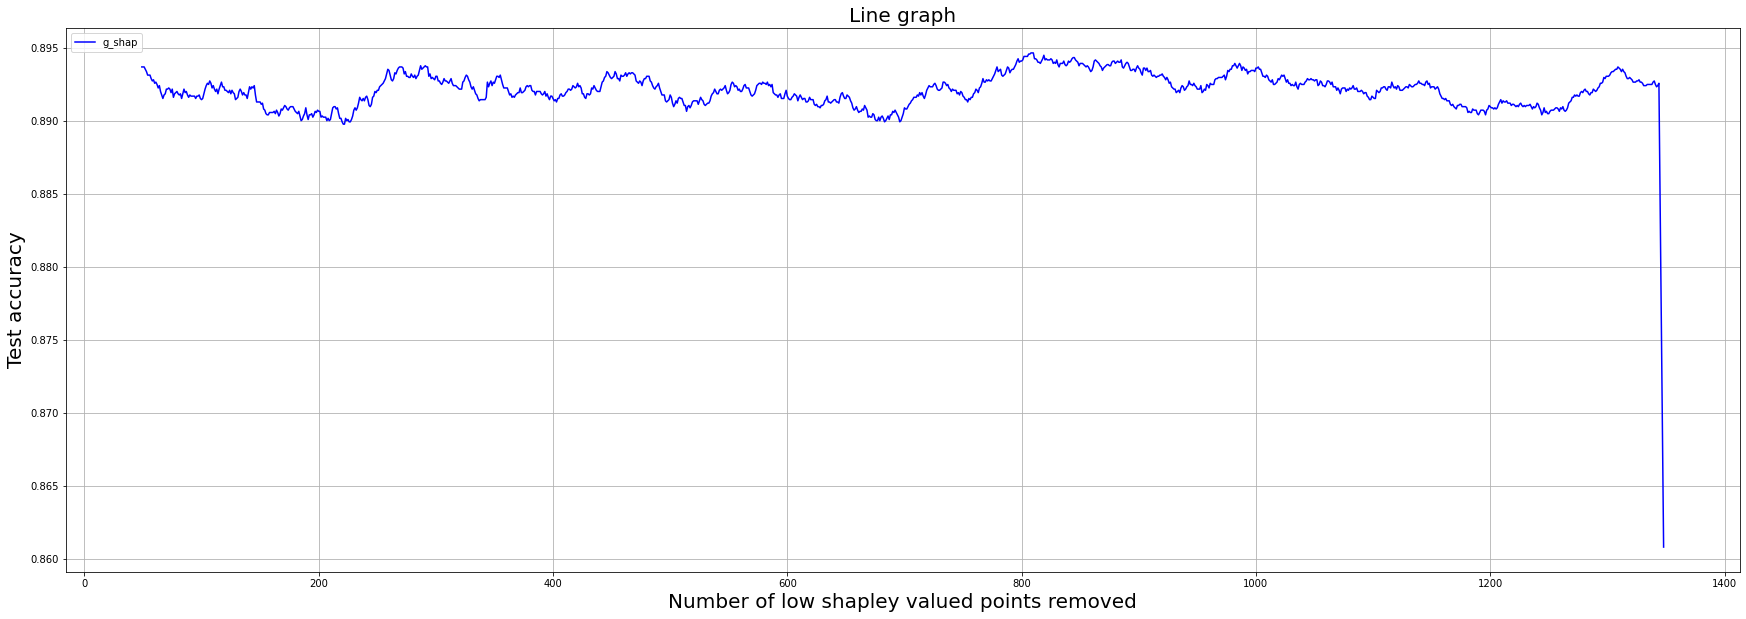

In [ ]:
'''d = dict()
d1 = dict()

for i in loo_order:
  d1[i] = loo_value[i]
d1=dict(sorted(d1.items(), key=lambda t: t[1]))

print(d1.keys())
for i in d1.keys():
  d[i] = (list(X_raw[i]),y_raw[i])
X_train = []  
y_train = []
for i in d.keys():
  X_train.append(X_raw[i])
  y_train.append(y_raw[i])
test_accuracy = []
for i in range(1,train_size):
  if i%100==0:
    print(str(i)+'/'+str(train_size))
  clf.fit(X_train[i:train_size], y_train[i:train_size])
  test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
  test_accuracy.append(test_acc)

df1 = pd.DataFrame(test_accuracy,columns=['Acc'])

#####        tmc_val        #####

d = dict()
d1 = dict()

for i in tmc_order:
  d1[i] = tmc_value[i]
d1=dict(sorted(d1.items(), key=lambda t: t[1]))

for i in d1.keys():
  d[i] = (list(X_raw[i]),y_raw[i])
X_train = []  
y_train = []
for i in d.keys():
  X_train.append(X_raw[i])
  y_train.append(y_raw[i])
test_accuracy = []
for i in range(1,train_size):
  if i%100==0:
    print(str(i)+'/'+str(train_size))
  clf.fit(X_train[i:train_size], y_train[i:train_size])
  test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
  test_accuracy.append(test_acc)

df2 = pd.DataFrame(test_accuracy,columns=['Acc'])'''

#####        g_val        #####

d = dict()
d1 = dict()

for i in range(len(g_order)):
  d1[g_order[i]] = g_value[i]
d1=dict(sorted(d1.items(), key=lambda t: t[1]))

for i in d1.keys():
  d[i] = (list(X_raw[i]),y_raw[i])
X_train = []  
y_train = []
for i in d.keys():
  X_train.append(X_raw[i])
  y_train.append(y_raw[i])
test_accuracy = []
for i in range(1,train_size):
  if i%100==0:
    print(str(i)+'/'+str(train_size))
  clf_d = return_model(model , hidden_layer_sizes=tuple(hidden_units),learning_rate = 0.1,activation = 'tanh')  
  clf_d.fit(X_train[i:train_size], y_train[i:train_size])
  test_acc = clf_d.score(X_raw[train_size:], y_raw[train_size:])
  test_accuracy.append(test_acc)

df3 = pd.DataFrame(test_accuracy,columns=['Acc'])

fig, ax = plt.subplots(figsize=(30,10)) 
plt.title("Line graph",fontsize = 20)  
plt.xlabel("Number of low shapley valued points removed",fontsize = 30)  
plt.ylabel("Test accuracy",fontsize = 30)  
#plt.plot(df1['Acc'].rolling(150).mean(),color='r', label="loo")
#plt.plot(df2['Acc'].rolling(150).mean(),color='g', label="tmc")
plt.plot(df3['Acc'].rolling(50).mean(),color='b', label="g_shap")
plt.legend(loc="upper left")
plt.grid() 
plt.show()

In [ ]:
######## ----------------END--------------------#############